# Condiciones iniciales para el gas en un tubo unidimensional

[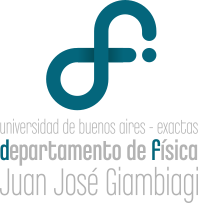](https://www.df.uba.ar/)  

[cc-by-sa-80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado de problema
Un tabique divide un tubo dividido en dos regiones.
En la izquierda hay una presión constante $p = p_0 + \Delta p$ en tanto que en la derecha está a $p_0$ pues está abierta a la atmósfera.
A $t = 0$ se remueve el tabique.
Halle $\delta p(x,t)$, $\psi(x,t)$ y $\delta\rho(x,t)$ conociendo $p_{0}$, $\Delta p\ll P_{0}$, $L$, $v_\text{sonido}$ y que $\gamma= \frac{7}{5}$ para un gas diatómico.  
![](figuras/ej1-31-eps-converted-to.png)

## Solución general de la ecuación de onda
Para el desplazamiento longitudinal de moléculas del gas.

In [1]:
import sympy as sym

[p0, Dp, L, vsonido, gamma] = sym.symbols(('p_0', r'\Delta p', 'L', 'v_{sonido}', 'gamma'), positive=True)
gamma_valor = sym.Rational(7,5)
[x, t, A, B, k, omega, phi] = sym.symbols('x, t, A, B, k, omega, phi')

In [2]:
psi = sym.Function('psi')(x,t)
psi_exp = ( A* sym.cos(k* x) + B* sym.sin(k* x) )* sym.cos(omega* t + phi)
sym.Eq(psi,psi_exp,evaluate=False)

Eq(psi(x, t), (A*cos(k*x) + B*sin(k*x))*cos(omega*t + phi))

## Condición inicial: parte del reposo 
Al remover el gas se supone que el gas está en reposo.

In [3]:
sym.Eq(psi.diff(t).subs(t,0), 0, evaluate=False)

Eq(Subs(Derivative(psi(x, t), t), t, 0), 0)

In [4]:
condicionReposo= sym.Eq(psi_exp.diff(t).subs(t,0),0)
condicionReposo

Eq(-omega*(A*cos(k*x) + B*sin(k*x))*sin(phi), 0)

Los valores de $\phi$ que complen esto son

In [5]:
phi_solve = sym.solve(condicionReposo,phi)
phi_solve

[0, pi]

La solución general queda reducida a

In [6]:
psi_exp= psi_exp.subs(phi,phi_solve[0]) # phi_solve[0] toma el primer elemento de la lista con las soluciones
sym.Eq(psi,psi_exp,evaluate=False)

Eq(psi(x, t), (A*cos(k*x) + B*sin(k*x))*cos(omega*t))

## Condiciones de contorno
En el extremo cerrado en $x=0$ no pueden desplazarse las moléculas

In [7]:
sym.Eq(psi.subs(x,0), 0, evaluate=False)

Eq(psi(0, t), 0)

In [8]:
condicionCerrado= sym.Eq(psi_exp.subs(x,0),0)
condicionCerrado

Eq(A*cos(omega*t), 0)

Esto implica que $A=$

In [9]:
A_solve = sym.solve(condicionCerrado,A)
A_solve

[0]

Queda la solución

In [10]:
psi_exp= psi_exp.subs(A,A_solve[0])
sym.Eq(psi,psi_exp,evaluate=False)

Eq(psi(x, t), B*sin(k*x)*cos(omega*t))

En el extremo abierto en $x=L$ no hay discontinuidad en el desplazamiento de las moléculas
$$
\frac{\partial \psi}{\partial x} \bigg\rvert_{x=L} = 0
$$

In [11]:
# sp.Eq(psi.diff(x).subs(x,L), 0, evaluate=False) # (!) reemplaza x de derivación: ver sym.replace o sym.subs
condicionAbierto= sym.Eq(psi_exp.diff(x).subs(x,L),0)
condicionAbierto

Eq(B*k*cos(L*k)*cos(omega*t), 0)

Esto impone sobre k

In [12]:
k_solve = sym.solve(condicionAbierto,k)
k_solve

[0, -pi/(2*L), pi/(2*L)]

Sabemos resumir la sucesión de estos resultados en 

In [13]:
n = sym.symbols('n', integer=True, positive=True )
kn = sym.Function('k')(n)
kn_exp= (n- sym.Rational(1,2) )* sym.pi/ L
sym.Eq(kn, kn_exp, evaluate=False)

Eq(k(n), pi*(n - 1/2)/L)

Siendo $n \in \mathbb{N}$.

Con esto y la relación de dispersión $\omega = v_\text{sonido} k$ la solución general queda

In [14]:
Bn = sym.Function('B')(n)
psi_modos = sym.Sum( Bn* sym.sin(kn* x)* sym.cos(vsonido* kn* t), (n, 1, sym.oo) )
sym.Eq(psi, psi_modos, evaluate=False)

Eq(psi(x, t), Sum(B(n)*sin(x*k(n))*cos(t*v_{sonido}*k(n)), (n, 1, oo)))

## Condición inicial sobre $\delta p$
$$
\delta p(x,0) =
\begin{cases}
\Delta p & 0 < x < \frac{L}{3} \\
0 & \frac{L}{3} < x < L
\end{cases}
$$

Recordemos que $\delta p =- \gamma p_0 \frac{\partial \psi}{\partial x}$

In [15]:
dp = sym.Function('\delta p')(x,t)
dp_exp = - gamma* p0* psi_modos.diff(x)
sym.Eq(dp, dp_exp, evaluate=False)

Eq(\delta p(x, t), -gamma*p_0*Sum(B(n)*k(n)*cos(x*k(n))*cos(t*v_{sonido}*k(n)), (n, 1, oo)))

Que en el tiempo inicial

In [16]:
sym.Eq(dp, dp_exp, evaluate=False).subs(t,0)

Eq(\delta p(x, 0), -gamma*p_0*Sum(B(n)*k(n)*cos(x*k(n)), (n, 1, oo)))

Busco ahora _proyectar_ la condición inicial en una base $\cos(x k(m) )$ la condición inicial.

In [17]:
m = sym.symbols('m')
km = sym.Function('k')(m)
base = sym.cos(km* x)
base

cos(x*k(m))

Para esto multiplico por esa base la igualdad

In [18]:
sym.Eq(dp* base, dp_exp* base, evaluate=False).subs(t,0)

Eq(\delta p(x, 0)*cos(x*k(m)), -gamma*p_0*cos(x*k(m))*Sum(B(n)*k(n)*cos(x*k(n)), (n, 1, oo)))

E integro donde está definida $\delta p(x,0)$, es decir $0 < x < L$

In [19]:
intIzq = sym.integrals.Integral(dp* base,(x,0,L))
intDer = sym.integrals.Integral(dp_exp.subs(t,0)* base,(x,0,L))
sym.Eq(intIzq, intDer, evaluate=False)

Eq(Integral(\delta p(x, t)*cos(x*k(m)), (x, 0, L)), Integral(-gamma*p_0*cos(x*k(m))*Sum(B(n)*k(n)*cos(x*k(n)), (n, 1, oo)), (x, 0, L)))

In [20]:
Dp= sym.Symbol('\Delta p')
intIzq = Dp* sym.integrals.Integral(base.subs(m,n), (x,0,L/3))
intDer = sym.integrals.Integral(dp_exp.subs(t,0)* base.subs(m,n),(x,0,L))
sym.Eq(intIzq, intDer, evaluate=False)

Eq(\Delta p*Integral(cos(x*k(n)), (x, 0, L/3)), Integral(-gamma*p_0*cos(x*k(n))*Sum(B(n)*k(n)*cos(x*k(n)), (n, 1, oo)), (x, 0, L)))

Para resolver el lado derecho basta recordar
$$
\int_{-\pi}^{\pi} \cos(mx)\, \cos(nx)\, dx = \frac{1}{2}\int_{-\pi}^{\pi} \cos((n-m)x)+\cos((n+m)x)\, dx = \pi \delta_{mn} ,
$$
ergo
$$
\int_{0}^{\pi} \cos(mx)\, \cos(nx)\, dx = \frac{\pi}{2} \delta_{mn} ,
$$
y con un cambio de variable $x' = \frac{L}{\pi} x$,
$$
\frac{L}{\pi} \int_{0}^{L} \cos(m \frac{2 \pi}{L} x')\, \cos(n \frac{2 \pi}{L} x')\, dx' = \frac{L}{\pi} \frac{\pi}{2} \delta_{mn} = \frac{L}{2} \delta_{mn}
$$

In [21]:
intIzq_eval= intIzq.doit()
# intIzq_eval= intIzq.subs(kn, kn_exp).doit()
intDer_eval = - Bn* gamma* p0* L/2
Bn_sistema = sym.Eq(intIzq_eval.args[1].args[1][0], intDer_eval, evaluate=False)
Bn_sistema

Eq(L/3, -L*gamma*p_0*B(n)/2)

Con lo que finalmente podemos obtener la amplitud de cada modo $B(n)$ de $\psi(x,t)$

In [22]:
Bn_exp = sym.solve(Bn_sistema, Bn)
sym.Eq(Bn, Bn_exp[0], evaluate=False)

Eq(B(n), -2/(3*gamma*p_0))

In [23]:
psi_final = sym.Eq(psi, psi_modos.subs(Bn, Bn_exp[0]), evaluate=False)
psi_final

Eq(psi(x, t), Sum(-2*sin(x*k(n))*cos(t*v_{sonido}*k(n))/(3*gamma*p_0), (n, 1, oo)))

In [24]:
psi_final.subs(kn, kn_exp).subs(gamma, gamma_valor)

Eq(psi(x, t), Sum(-10*sin(pi*x*(n - 1/2)/L)*cos(pi*t*v_{sonido}*(n - 1/2)/L)/(21*p_0), (n, 1, oo)))

Para la diferencia de presión respecto a la de referencia

In [25]:
dp_modos = dp_exp
dp_final = sym.Eq(dp, dp_modos.subs(Bn, Bn_exp[0]), evaluate=False)
dp_final

Eq(\delta p(x, t), -gamma*p_0*Sum(-2*k(n)*cos(x*k(n))*cos(t*v_{sonido}*k(n))/(3*gamma*p_0), (n, 1, oo)))

In [26]:
dp_final.subs(kn, kn_exp).subs(gamma, gamma_valor)

Eq(\delta p(x, t), -7*p_0*Sum(-10*pi*(n - 1/2)*cos(pi*x*(n - 1/2)/L)*cos(pi*t*v_{sonido}*(n - 1/2)/L)/(21*L*p_0), (n, 1, oo))/5)

Y para la densidad $\delta \rho = - \rho_0 \frac{\partial \psi}{\partial x}$

In [27]:
rho0 = sym.Symbol('rho_0')
drho = sym.Function('\delta'+r'\rho')(x,t)
drho_exp = - rho0* psi_modos.diff(x)
sym.Eq(drho, drho_exp, evaluate=False)

Eq(\delta\rho(x, t), -rho_0*Sum(B(n)*k(n)*cos(x*k(n))*cos(t*v_{sonido}*k(n)), (n, 1, oo)))

In [28]:
drho_modos = drho_exp
drho_final = sym.Eq(drho, drho_modos.subs(Bn, Bn_exp[0]), evaluate=False)
drho_final

Eq(\delta\rho(x, t), -rho_0*Sum(-2*k(n)*cos(x*k(n))*cos(t*v_{sonido}*k(n))/(3*gamma*p_0), (n, 1, oo)))

In [29]:
drho_final.subs(kn, kn_exp).subs(gamma, gamma_valor)

Eq(\delta\rho(x, t), -rho_0*Sum(-10*pi*(n - 1/2)*cos(pi*x*(n - 1/2)/L)*cos(pi*t*v_{sonido}*(n - 1/2)/L)/(21*L*p_0), (n, 1, oo)))